In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv('Suicides in India 2001-2012.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
State        237519 non-null object
Year         237519 non-null int64
Type_code    237519 non-null object
Type         237519 non-null object
Gender       237519 non-null object
Age_group    237519 non-null object
Total        237519 non-null int64
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [5]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [7]:
data = data.dropna()
print(data.shape)

(237519, 7)


In [10]:
useful_columns = ['State', 'Year', 'Type_code', 'Type', 
                  'Gender', 'Age_group', 'Total']
data[useful_columns].head(5)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


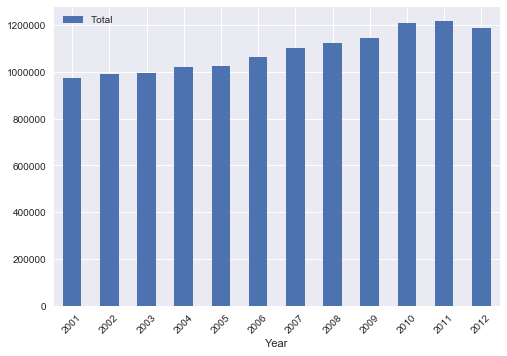

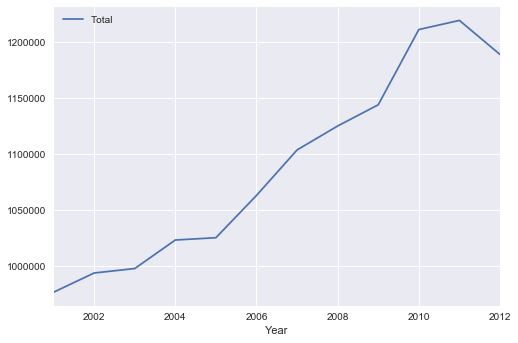

In [19]:
#sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
#sales_df.groupby('Year_of_Release').sum().plot()
#sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

suicides_df = data[[x for x in data.columns if 'Total' in x] + ['Year']]
suicides_df.groupby('Year').sum().plot(kind = 'bar', rot = 45)
suicides_df.groupby('Year').sum().plot()

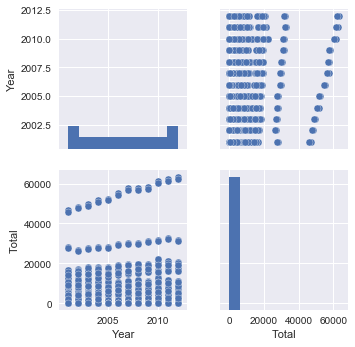

In [22]:
sns_plot = sns.pairplot(data[useful_columns])

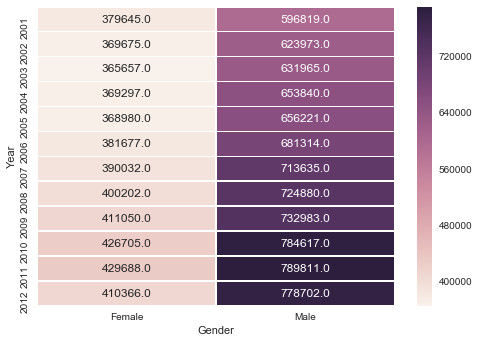

In [30]:
#platform_genre_sales = df.pivot_table(
                       # index='Platform', 
                      #  columns='Genre', 
                       # values='Global_Sales', 
                       # aggfunc=sum).fillna(0).applymap(float)
#sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)
suicides_df = data.pivot_table(
                index='Year',
                columns='Gender',
                values='Total',
                aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(suicides_df, annot=True, fmt=".1f", linewidths=.5)